# Luis Martinez

# House Prices - Advanced Regression Techniques

# Import Libraries

In this step I import libraries required for data processing and feature engineering.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Load Data

In this step I load the training and testing datasets into pandas dataframe.

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
# chacking train data:

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# chacking test data:

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Exploratory Data Analysis (EDA)

In [5]:
# Importing this libraries for the Text Color:

import termcolor
from termcolor import colored

In [6]:
# Let's check the shape of both datasets:

print(f"Shape of traning data= {colored(train.shape,'blue')}, test data:{colored(test.shape,'green')}")

Shape of traning data= (1460, 81), test data:(1459, 80)


In [7]:
# Checking for duplicates in the train data:

train.duplicated(subset='Id').sum()

0

In [8]:
# Checking for duplicates in the test data:

test.duplicated(subset='Id').sum()

0

In [9]:
# Checking the info regardinfg type of variable and nulls values of all the variables:

info =  train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Let's describe the train data getting statistics os the variables:

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Checking for the number of unique values of each variable of the train data:

for col in train.columns:
    print("The number of values for", col + ":" + colored(str(len(train[col].unique())), 'blue'))

The number of values for Id:1460
The number of values for MSSubClass:15
The number of values for MSZoning:5
The number of values for LotFrontage:111
The number of values for LotArea:1073
The number of values for Street:2
The number of values for Alley:3
The number of values for LotShape:4
The number of values for LandContour:4
The number of values for Utilities:2
The number of values for LotConfig:5
The number of values for LandSlope:3
The number of values for Neighborhood:25
The number of values for Condition1:9
The number of values for Condition2:8
The number of values for BldgType:5
The number of values for HouseStyle:8
The number of values for OverallQual:10
The number of values for OverallCond:9
The number of values for YearBuilt:112
The number of values for YearRemodAdd:61
The number of values for RoofStyle:6
The number of values for RoofMatl:8
The number of values for Exterior1st:15
The number of values for Exterior2nd:16
The number of values for MasVnrType:5
The number of value

In [12]:
# Checking for the number of unique values of each variable of the test data:

for col in test.columns:
    print("The number of values for", col + "is :" + colored(str(len(test[col].unique())), 'green'))

The number of values for Idis :1459
The number of values for MSSubClassis :16
The number of values for MSZoningis :6
The number of values for LotFrontageis :116
The number of values for LotAreais :1106
The number of values for Streetis :2
The number of values for Alleyis :3
The number of values for LotShapeis :4
The number of values for LandContouris :4
The number of values for Utilitiesis :2
The number of values for LotConfigis :5
The number of values for LandSlopeis :3
The number of values for Neighborhoodis :25
The number of values for Condition1is :9
The number of values for Condition2is :5
The number of values for BldgTypeis :5
The number of values for HouseStyleis :7
The number of values for OverallQualis :10
The number of values for OverallCondis :9
The number of values for YearBuiltis :106
The number of values for YearRemodAddis :61
The number of values for RoofStyleis :6
The number of values for RoofMatlis :4
The number of values for Exterior1stis :14
The number of values for 

In [13]:
# Checking number of types of data in the train dataset:

train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [14]:
# Checking number of types of data in the test dataset:

test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

After this inspection of the datasets, we see that there are a total of 1460 training examples and 1459 test examples.
In the train dataset there is a total number of attributes/features equals 81, which includes ID and SalePrice.
There is 80 attributes/features on the test data and it doesn't contain the variable 'SalePrice'. which is going to be 
the target variable.

In [15]:
# Saving the identification column:

train_ID = train['Id']
test_ID = test['Id']

# Dropping it from the datasets:

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [16]:

# Concatenating both datasets:

concat = [train,test]

# Dropping the index of the DataFrame and replaces it with an index of increasing integers:

all_data = pd.concat(concat).reset_index(drop=True)  
                                                    
# Deleting SalePrice from all_data:

all_data.drop(['SalePrice'], axis=1, inplace=True)

In [17]:
# Checking the new dataframe:

all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [18]:
# Let's check the shape of the new dataframe:

print(f"Shape of traning data= {colored(all_data.shape,'blue')}")

Shape of traning data= (2919, 79)


# Missing Values 

### Delete Unuseful Features:

In [19]:
# 'Utilities' feature contains almost all the values of one type of utility only. Since it wont be usefull 
# in modeling we can drop this feature:

all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [20]:
# 'Street' feature also contains the unbalance data of type of road access to property. We can drop it:

all_data['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [21]:
# 'PoolQC' most of the data is missing for this feature, we can drop it:

all_data['PoolQC'].value_counts()

Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64

In [22]:
# Let's drop all these unuseful variables:

all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (2919, 76)


### Missing Values analysis:

<AxesSubplot:>

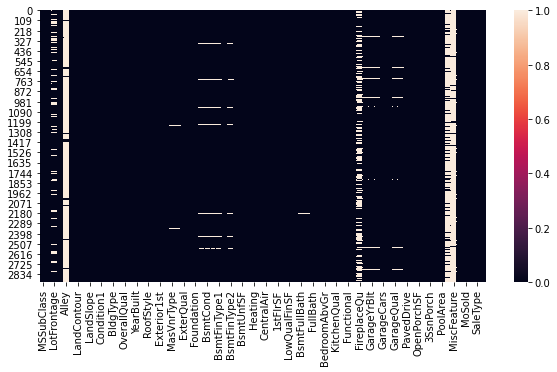

In [23]:
# Visualizing missing values:

plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

Categorical variables:

In [24]:
# Checking the categorical variables that content Null values:

display('Categorical Columns that content Null values')
cate = all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)
cate[cate > 0]


'Categorical Columns that content Null values'

MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Electrical         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
dtype: int64

In [25]:
# Let's check for the percentage of these categorical variables that content Null values:

categorical_miss_perct = round(100*(all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:10]
categorical_miss_perct

,Null values percentage
MiscFeature,96.40
Alley,93.22
Fence,80.44
FireplaceQu,48.65
GarageCond,5.45
GarageQual,5.45
GarageFinish,5.45
GarageType,5.38
BsmtCond,2.81
BsmtExposure,2.81


In [26]:
# 'MiscFeature', 'Alley', 'Fence' for all of these featurs most of their 90% data is missing, so we can drop it:

all_data = all_data.drop(['MiscFeature', 'Alley', 'Fence',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (2919, 73)


In [27]:
# Fixing categorical variables:

# MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType,
# GarageType, GarageFinish, GarageQual, GarageCond, MSZoning, Functional, SaleType, Exterior2nd, Exterior1st, 
# KitchenQual    = replace with None:

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')
all_data['Functional'] = all_data['Functional'].fillna('None')
all_data['SaleType'] = all_data['SaleType'].fillna('None')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('None')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('None')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('None')

Numerical variables:

In [28]:
# Checking the numerical variables that content Null values:

display('Numerical Columns that content Null values')
num = all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)
num[num > 0]

'Numerical Columns that content Null values'

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
dtype: int64

In [29]:
numerical_miss_perct = round(100*(all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:5]
numerical_miss_perct

# As we can see, the percentage of missing values in the numerical variebles doesn't even reach the 17% in those variables with the 
# highest amount of nulls. So I am not going to elimante any of them.

,Null values percentage
LotFrontage,16.65
GarageYrBlt,5.45
MasVnrArea,0.79
BsmtHalfBath,0.07
BsmtFullBath,0.07


In [30]:
# Fixing numerical variables:

# Groupping by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood:

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# MasVnrArea, GarageYrBlt, BsmtFullBath, BsmtHalfBath, TotalBsmtSF, GarageArea, BsmtFinSF2, BsmtFinSF1,
# BsmtUnfSF and GarageCars = replace with zero:

all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(int(0))
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(int(0))
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(int(0))
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(int(0))
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(int(0))
all_data['GarageArea'] = all_data['GarageArea'].fillna(int(0))
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(int(0))
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(int(0))
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(int(0))
all_data['GarageCars'] = all_data['GarageCars'].fillna(int(0))

In [31]:
# Checking if there is any miss value:

sum(all_data.select_dtypes(include=object).isna().sum() != 0)

0

<AxesSubplot:>

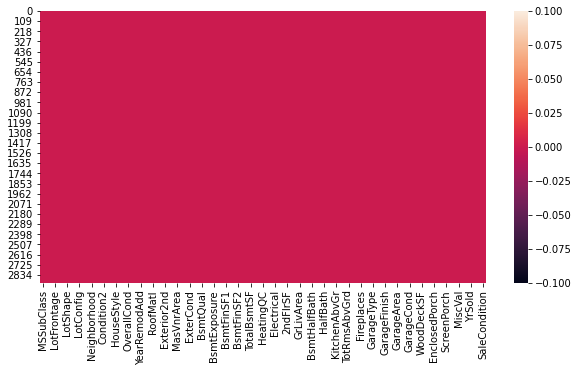

In [32]:
# Visualizing whether there is any null value or not after recoding:

plt.figure(figsize=(10, 5))
sns.heatmap(all_data.isna())

In [33]:
# Checking for any miss value without visualization:

all_data.loc[:, all_data.isna().any()]

""
0
1
2
3
4
...
2914
2915
2916
2917


# Analysis of the target variable

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


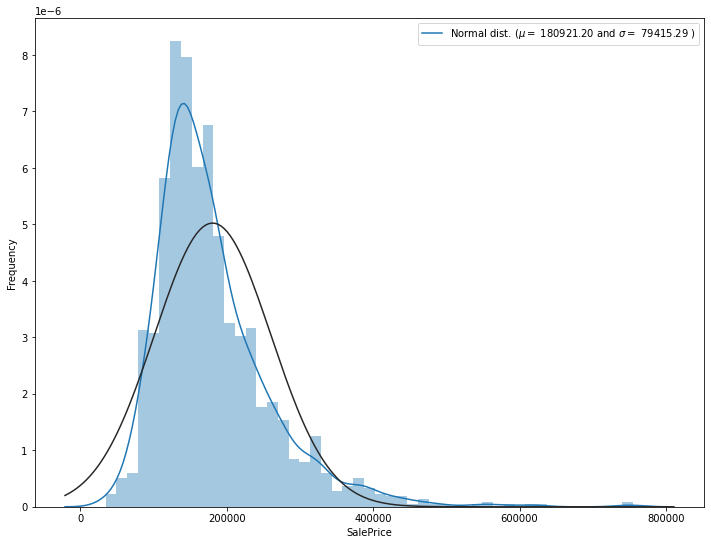

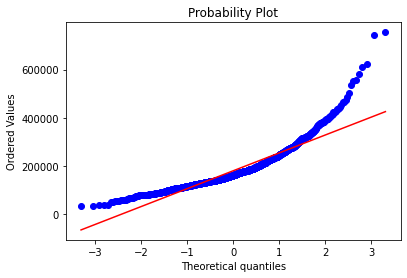

In [34]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# Plotting with the distribution:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [35]:
# Analysis of the kurtosis and the skewness to check the normality of the variable:

kurt = train['SalePrice'].kurtosis()
skew = train['SalePrice'].skew()
print('Sale Price Kurtorsis {}'.format(kurt))
print('Sale Price Skewness {}'.format(skew))

Sale Price Kurtorsis 6.536281860064529
Sale Price Skewness 1.8828757597682129


c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


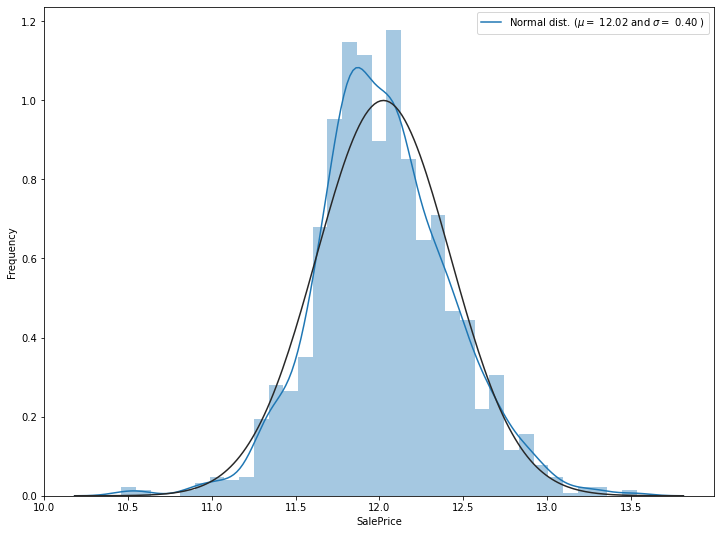

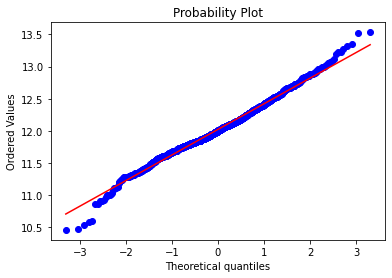

In [36]:
# Using log function for normalize the target variable:

train['SalePrice'] = np.log1p(train['SalePrice'])

# Checking to see the  normal distribution of the variable now:

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# Plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Correlation

In [37]:
# lets see the correlation between columns and target column:

corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,SalePrice
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608
GarageYrBlt,0.541073


In [38]:
# Separating variable into new dataframe from original dataframe which has only numerical values
# There is 38 numerical attribute from 81 attributes:

train_corr = train.select_dtypes(include=[np.number])
train_corr.shape

(1460, 37)

<AxesSubplot:>

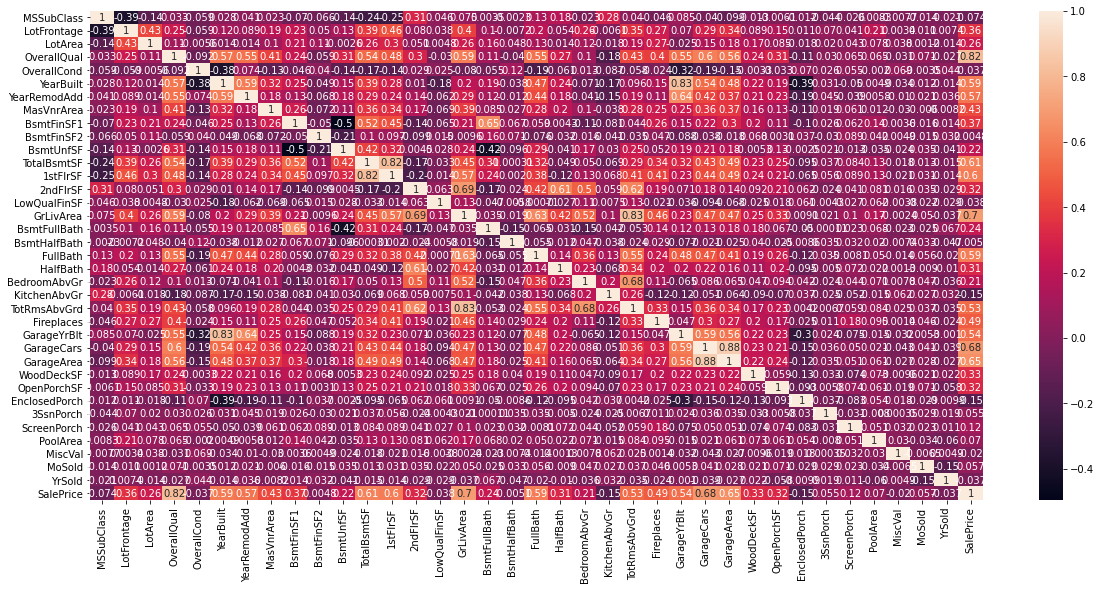

In [39]:
# Coralation plot:

corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

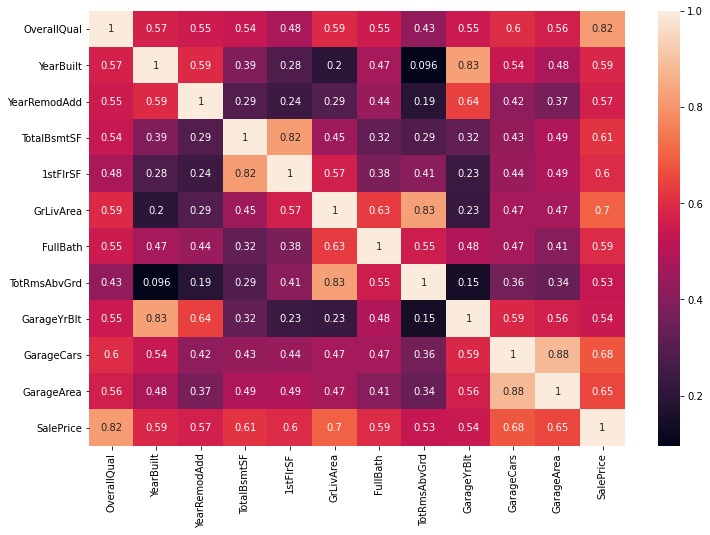

In [40]:
# Checking correlation higher than 0.5:

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Encoding 

In [41]:
# let's separeting the categorical variables into ordinals and nominals:

# Ordinals:

categorical_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
                     'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond','PavedDrive']

In [42]:
# Nominals:

categorical_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir',
                     'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st',
                     'Exterior2nd', 'Heating', 'Foundation']

In [43]:
# From sklearn importing LabelEncoder library to encode the ordinal variables:

from sklearn.preprocessing import LabelEncoder
for col in categorical_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [44]:
# Get k-1 dummies in nominal variables to avoid multicollinearity:

cat_feats_nominal_one_hot = pd.get_dummies(all_data[categorical_nominal], drop_first= True).reset_index(drop=True)

# checking it:

print(f'Shape of cat_feats_nominal_one_hot: {cat_feats_nominal_one_hot.shape}')
cat_feats_nominal_one_hot.head()

Shape of cat_feats_nominal_one_hot: (2919, 118)


,MSSubClass,MoSold,YrSold,MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,2,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,20,5,2007,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,60,9,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,70,2,2006,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,60,12,2008,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [45]:
# Now lets concatenate the one Hot Encoded categorcal nominal features with main data frame.

# First we need to drop the catgorical nominal columns from all_data:

all_data = all_data.drop(categorical_nominal, axis= 'columns')

# Now let;s to concat it:

all_data = pd.concat([all_data, cat_feats_nominal_one_hot], axis='columns')

# Checking shape now:

print(f'Shape of all_data: {all_data.shape}')

# Checking sfinal dataframe:

all_data.head()

Shape of all_data: (2919, 174)


,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,3,3,4,0,0,7,5,2003,...,1,0,0,0,0,0,1,0,0,0
1,80.0,9600,3,3,2,0,0,6,8,1976,...,1,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,3,4,0,0,7,5,2001,...,1,0,0,0,0,0,1,0,0,0
3,60.0,9550,0,3,0,0,0,7,5,1915,...,1,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,3,2,0,0,8,5,2000,...,1,0,0,0,0,0,1,0,0,0


# MODELLING

In [47]:
# Let's separate data:

train_data = pd.DataFrame(all_data[:1460])
test_data = pd.DataFrame(all_data[1460:])

test_data.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
1460,80.0,11622,3,3,4,0,0,5,6,1961,...,1,0,0,0,0,1,0,0,0,0
1461,81.0,14267,0,3,0,0,0,6,6,1958,...,1,0,0,0,0,1,0,0,0,0
1462,74.0,13830,0,3,4,0,0,5,5,1997,...,1,0,0,0,0,0,1,0,0,0
1463,78.0,9978,0,3,4,0,0,6,6,1998,...,1,0,0,0,0,0,1,0,0,0
1464,43.0,5005,0,1,4,0,4,8,5,1992,...,1,0,0,0,0,0,1,0,0,0


In [48]:
# Taking values X and y:

X = train_data
y = train['SalePrice']

## Selecting features

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

In [173]:
# Como es un problema de regrsion, usamos el mutual_info_regression, ya que el otro me estaba dando un problema de 'continuos'

i_scores = mutual_info_regression(X,y)
i_scores

array([0.57078703, 0.4585989 , 0.36135654, 0.36229711, 0.35752967,
       0.3673677 , 0.32949732, 0.31937657, 0.32637246, 0.30060565,
       0.27199696, 0.27292022, 0.26323996, 0.26031364, 0.22801901,
       0.22001358, 0.21161613, 0.21704928, 0.2038047 , 0.19772996,
       0.17435537, 0.16898294, 0.16961885, 0.1543201 , 0.15549231,
       0.14977313, 0.14197224, 0.12739897, 0.11437906, 0.10218097])

In [174]:
mi = dict()

for i,j in zip(train_data.columns,i_scores):
    mi[i]=j

df = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df.head(10)

,I-Gain
OverallQual,0.570787
GrLivArea,0.458599
GarageArea,0.367368
TotalBsmtSF,0.362297
GarageCars,0.361357
YearBuilt,0.357530
ExterQual,0.329497
BsmtQual,0.326372
KitchenQual,0.319377
1stFlrSF,0.300606


In [175]:
df.shape

(30, 1)

In [176]:
new_df = df[df['I-Gain']> 0.1]

In [177]:
new_df.head()

,I-Gain
OverallQual,0.570787
GrLivArea,0.458599
GarageArea,0.367368
TotalBsmtSF,0.362297
GarageCars,0.361357


In [178]:
new_df.shape

(30, 1)

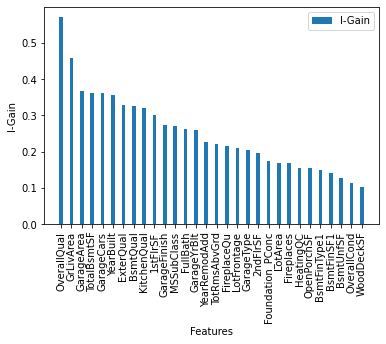

In [179]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

n = len(new_df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(new_df.index, new_df["I-Gain"], label='I-Gain',width=.35)

ax.xaxis.set_major_locator(mticker.FixedLocator(range(0,n)))
ax.set_xticklabels(list(new_df.index), rotation = 90)

ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

In [180]:
nuevo = []

for i in new_df.index:
    nuevo.append(i)

In [181]:
all_data = all_data[nuevo]

In [182]:
all_data.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,GarageCars,YearBuilt,ExterQual,BsmtQual,KitchenQual,1stFlrSF,...,Foundation_PConc,LotArea,Fireplaces,HeatingQC,OpenPorchSF,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,OverallCond,WoodDeckSF
0,7,1710,548.0,856.0,2.0,2003,2,2,2,856,...,1,8450,0,0,61,2,706.0,150.0,5,0
1,6,1262,460.0,1262.0,2.0,1976,3,2,4,1262,...,0,9600,1,0,0,0,978.0,284.0,8,298
2,7,1786,608.0,920.0,2.0,2001,2,2,2,920,...,1,11250,1,0,42,2,486.0,434.0,5,0
3,7,1717,642.0,756.0,3.0,1915,3,4,2,961,...,0,9550,1,2,35,0,216.0,540.0,5,0
4,8,2198,836.0,1145.0,3.0,2000,2,2,2,1145,...,1,14260,1,0,84,2,655.0,490.0,5,192


In [183]:
# Let's separate data:

train_data = pd.DataFrame(all_data[:1460])
test_data = pd.DataFrame(all_data[1460:])

test_data.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,GarageCars,YearBuilt,ExterQual,BsmtQual,KitchenQual,1stFlrSF,...,Foundation_PConc,LotArea,Fireplaces,HeatingQC,OpenPorchSF,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,OverallCond,WoodDeckSF
1460,5,896,730.0,882.0,1.0,1961,3,4,4,896,...,0,11622,0,4,0,5,468.0,270.0,6,140
1461,6,1329,312.0,1329.0,1.0,1958,3,4,2,1329,...,0,14267,0,4,36,0,923.0,406.0,6,393
1462,5,1629,482.0,928.0,2.0,1997,3,2,4,928,...,1,13830,1,2,34,2,791.0,137.0,5,212
1463,6,1604,470.0,926.0,2.0,1998,3,4,2,926,...,1,9978,1,0,36,2,602.0,324.0,6,360
1464,8,1280,506.0,1280.0,2.0,1992,2,2,2,1280,...,1,5005,0,0,82,0,263.0,1017.0,5,0


In [184]:
# Taking values X and y:

X = train_data
y = train['SalePrice']

In [139]:
# Split data into train and test formate:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

In [140]:
# Checking:

print(f'Training set sizes: {X_train.shape}, {y_train.shape}')
print(f'Validation set sizes: {X_test.shape}, {y_test.shape}')

Training set sizes: (1168, 30), (1168,)
Validation set sizes: (292, 30), (292,)


## Linear Regression

In [141]:
# Training the model:

from sklearn import linear_model
model_lineal = linear_model.LinearRegression()

In [142]:
# Fitting the model:

model_lineal.fit(X_train, y_train)

LinearRegression()

In [143]:
# cross valitation si es para regresion tenemos que poner 'r2' si es para clasificacion 'accuracy'

from sklearn.model_selection import cross_val_score

print(cross_val_score(model_lineal, X_train, y_train, cv=10, scoring ='r2').mean())

0.8124406947347674


In [144]:
# First evaluation of the LinearRegression model:

print("Accuracy --> ", round(model_lineal.score(X_test, y_test)*100),"%")

Accuracy -->  84 %


In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE is: 
 0.0243598754946257


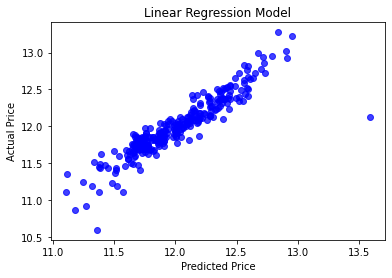

In [146]:
# Making predictions:

predictions_1 = model_lineal.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_1))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_1, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## RandomForestRegression

In [147]:
# Train the model:

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

In [148]:
# Fitting the model:

model2.fit(X_train, y_train)

RandomForestRegressor()

In [149]:
# First evaluation of the RandomForestRegression model:

print("Accuracy  --> ", round(model2.score(X_test, y_test)*100),"%")

Accuracy  -->  85 %


In [150]:
print(cross_val_score(model2, X_train, y_train, cv=10, scoring ='r2').mean())

0.8555408984255177


RMSE is: 
 0.022946779107363962


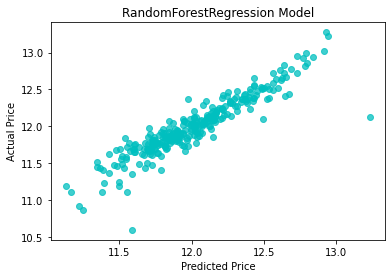

In [151]:
# Making predictions:

predictions_2 = model2.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_2))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_2, actual_values, alpha=.75,
            color='c')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForestRegression Model')
plt.show()

## BayesianRidge

In [152]:
# Train the model:

from sklearn.linear_model import BayesianRidge
baysian_ridge = BayesianRidge()#(compute_score=True,alpha_2=0.85)

# Fitting the model:

baysian_ridge.fit(X_train, y_train)


BayesianRidge()

In [153]:
# First evaluation of the BayesianRidge model:

print("Accuracy  --> ", round(baysian_ridge.score(X_test, y_test)*100),"%")

Accuracy  -->  84 %


In [154]:
print(cross_val_score(baysian_ridge, X_train, y_train, cv=10, scoring ='r2').mean())

0.8118370518328376


RMSE is: 
 0.024397015319286248


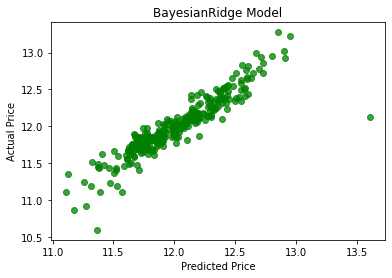

In [155]:
# Making predictions:

predictions_3 = baysian_ridge.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_3))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_3, actual_values, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('BayesianRidge Model')
plt.show()

## GradientBoostingRegressor

In [156]:
# Train the model:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Fitting the model:

gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [157]:
# First evaluation of the GradientBoostingRegressor model:

print("Accuracy --> ",round(gbr.score(X_test, y_test)*100),"%")

Accuracy -->  88 %


RMSE is: 
 0.018737445221167486


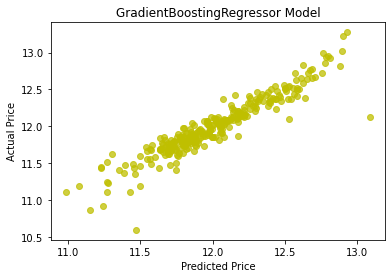

In [158]:
# Making predictions:

predictions_4 = gbr.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_4))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_4, actual_values, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GradientBoostingRegressor Model')
plt.show()

# EVALUATION MODELS

In [159]:
# Importing Libraries to carry out Cross Valitation:  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [160]:
All_models = ['Linear_Reg.','Random_Forest_Reg.','Bayesian_Ridge_Reg.','Grad_Boost_Reg.']

In [161]:
# Creation of the RMSE formula:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [162]:
# Cross Valitation formula:

def RMSE_CV(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [163]:
# Creating List for each measure:

RMSE_CV_scores = []
RMSE_scores = []
MAE_scores = []

In [164]:
# Calculating RMSE_CV for each one:

model_lineal_RMSE_CV = RMSE_CV(model_lineal, X_train, y_train)
RMSE_CV_scores.append(model_lineal_RMSE_CV)
RForest_model_RMSE_CV = RMSE_CV(model2, X_train, y_train)
RMSE_CV_scores.append(RForest_model_RMSE_CV)
baysian_ridge_model_RMSE_CV = RMSE_CV(baysian_ridge, X_train, y_train)
RMSE_CV_scores.append(baysian_ridge_model_RMSE_CV)
gbr_model_RMSE_CV = RMSE_CV(gbr, X_train, y_train)
RMSE_CV_scores.append(gbr_model_RMSE_CV)

# Calculating rmse for each one:

linear_model_rmse = rmse(y_test, predictions_1)
RMSE_scores.append(linear_model_rmse)
RForest_model_rmse = rmse(y_test, predictions_2)
RMSE_scores.append(RForest_model_rmse)
BayRidge_model_rmse = rmse(y_test, predictions_3)
RMSE_scores.append(BayRidge_model_rmse)
GBoosting_model_rmse = rmse(y_test, predictions_4)
RMSE_scores.append(GBoosting_model_rmse)

# Calculating mean_absolute_error for each one:

linear_model_mae = mean_absolute_error(predictions_1, y_test)
MAE_scores.append(linear_model_mae)
RForest_model_mae = mean_absolute_error(predictions_2, y_test)
MAE_scores.append(RForest_model_mae)
BayRidge_model_mae = mean_absolute_error(predictions_3, y_test)
MAE_scores.append(BayRidge_model_mae)
GBoosting_model_mae = mean_absolute_error(predictions_4, y_test)
MAE_scores.append(GBoosting_model_mae)

In [165]:
# Making all the results togheter for comparison:

final_evaluation_scores = pd.DataFrame(All_models, columns = ['Regressors'])
final_evaluation_scores['RMSE_CV_scores'] = RMSE_CV_scores
final_evaluation_scores['RMSE_scores'] = RMSE_scores
final_evaluation_scores['MAE_scores'] = MAE_scores
final_evaluation_scores

,Regressors,RMSE_CV_scores,RMSE_scores,MAE_scores
0,Linear_Reg.,0.158824,0.156077,0.101342
1,Random_Forest_Reg.,0.149345,0.151482,0.098383
2,Bayesian_Ridge_Reg.,0.158740,0.156195,0.100732
3,Grad_Boost_Reg.,0.141051,0.136885,0.091244


c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


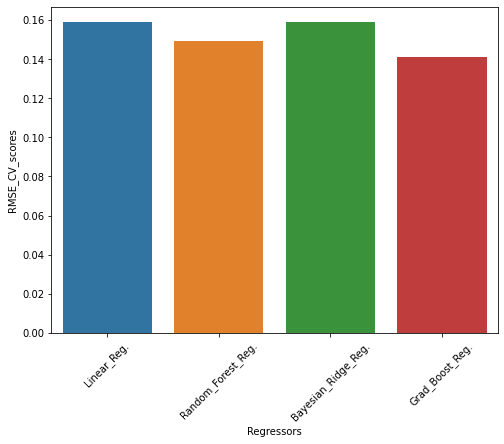

In [166]:
# Visualization RMSE_CV_scores:

plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_CV_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_CV_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


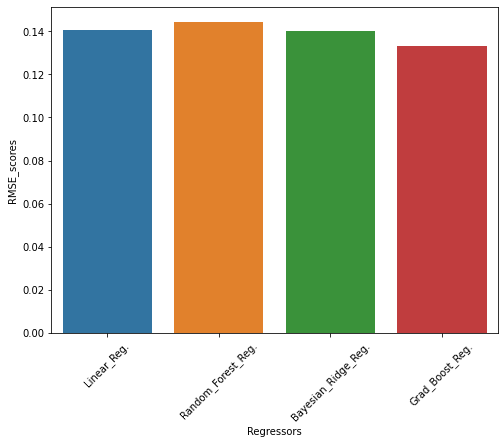

In [78]:
# Visualization RMSE_scores:


plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


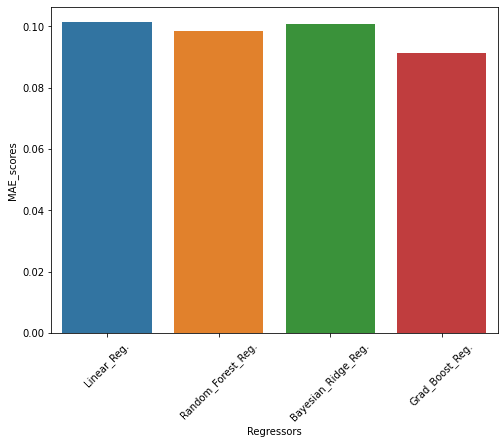

In [167]:
# Visualization MAE_scores:

plt.figure(figsize = (8,6))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['MAE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('MAE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

# FINAL STEP

In [168]:
# Mean of all model's prediction:

# I am doing an ensemble model that weighs each of the four different models equally, then he average prediction at each data 
# point becomes the final prediction at this data point.

# np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array

In [170]:
Final_model = (np.expm1(model_lineal.predict(test_data)) + np.expm1(model2.predict(test_data)) + np.expm1(baysian_ridge.predict(test_data)) + np.expm1(gbr.predict(test_data)) ) / 4
Final_model

array([118122.89560264, 154693.36898661, 179434.08513618, ...,
       161036.80270118, 111634.89622456, 236619.38780833])

In [171]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Final_model
sub.to_csv('submission.csv',index=False)

In [172]:
result4 =  pd.read_csv('submission.csv')
result4.head()

,Id,SalePrice
0,1461,118122.895603
1,1462,154693.368987
2,1463,179434.085136
3,1464,197325.204081
4,1465,189625.745448
